# L4 - Обучение с подкреплением (reinforcement learning)

**Обучение с подкреплением** - один из способов машинного обучения, где некоторый агент обучается, взаимодействуя со средой. В отличие от обучения с учителем тут нет размеченных данных. Однако агент обладает набором допустимых действий, выполняя которые, он получает награду. Цель агента - максимизировать суммарную награду за какой-то период времени. Рассмотрим возможные постановки задачи.

Материал этой лабораторной основывается на этой прекрасной [книге](https://webdocs.cs.ualberta.ca/~sutton/book/bookdraft2016sep.pdf), которой вы можете впоспользоваться.

## 1. Задача о многоруком бандите (multi-armed bandit problem)

### Постановка задачи

#### Неформальная
Пусть есть $N$ игровых автоматов. Сыграв на $i$-м автомате, агент получает награду, которая задается случайной величиной. Агент не знает, как устроены распределения, однако перед ним стоит задача максимизировать выигрыш, сыграв $T$ раз.

#### Формальная
Пусть есть конечное множество возможных действий $\mathcal{A}$. Для каждого действия $a \in \mathcal{A}$ существует премия, которая определяется неизвестным распределением $p(r|a)$. Стратегия агента (policy) в момент $t$ - это некоторое вероятностное распределение на множестве всех действий $\pi_t(a)$.

Игра происходит следующим образом:
> 1. У агента есть некоторая начальная стратегия $\pi_1(a)$
> 2. В каждый момент времени $1 \leq t \leq T$:
> 3. Выбирает действией $a_t \sim \pi_t(a)$
> 4. Получает свою награду $r_t \sim p(r|a_t)$
> 5. Корректирует свою стратегию $\pi_t \rightarrow \pi_{t+1}$

Пусть $c_t(a)$ - количество раз, которое агент выбрал действие $a$ к моменту $t$
$$c_t(a) = \sum_{i=1}^{t}[A_i = a]$$
Тогда задачей агента является минимизация сожаления к моменту $T$, а именно
$$T\cdot\mu^* - \sum_a \mu_a \mathbb{E}[c_T(a)]$$
* $\mu_a$ - мат. ожидание награды за действие $a$
* $\mu^* = \max_a \mu_a$ - мат. ожидание оптимального действия

Также можно встретить следующее определение сожаления:
$$T\cdot\mu^* - \mathbb{E}\big[ \sum_{t=1}^{T} R_t \big].$$

Впервые задача была предложена в этой [статье](http://projecteuclid.org/download/pdf_1/euclid.bams/1183517370).
### Модельная задача
1. $|A| = 100, T = 1000$
2. $\mu_a \sim \mathcal{N}(0, 1)$
3. $p(r|a) = \mathcal{N}(r; \mu_a, 1)$

Симуляция игры запускается $10^4$ раз, и строится график в осях **[номер шага в игре]** $\times$ **[усредненная суммарная премия к текущему шагу]**.

In [130]:
from tqdm import tqdm
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import multiprocessing as mp
from itertools import repeat

In [131]:
class Model:
    """ 
    Creates basic Model environment:
    Actions: |A|.
    Exp_action_val: Expected value of distribution in actions.
    Reward_exp: Probability to get a reward.
    
    """
    def __init__(self, actions):
        self.actions = actions
    def get_reward():
        pass
    
    
class Agent:
    """
    Agent implementation which maps every possible percepts sequence
    to a possible action the agent can perform or to a coefficient, feedback element,
    function or constant that affects eventual actions: f:P→A.
    """
    def __init__(self, model):
        self.model = model
        self.q_function = np.zeros((self.model.actions))
    
    def argmax(self, policy):
        return np.argwhere(policy == np.max(policy)).flatten()
    
    def get_reward(self, action):
        return self.model.get_reward(action)
    
    def choose_action(self, time):
        policy = self.get_policy()
        return np.random.choice(policy.size, p=policy)
    
    def correct_strategy(self, cur_reward, action):
        pass
    
    def get_policy(self):
        pass
    
    def update_Q(self, time, cur_reward, action):
        self.q_function = self.q_function * (time - 1)
        self.q_function[action] += cur_reward
        self.q_function /= time
    
    def step(self, time):
        action = self.choose_action(time)
        cur_reward = self.get_reward(action)
        self.update_Q(time, cur_reward, action)
        self.correct_strategy(cur_reward, action)
        return cur_reward

### Известные стратегии
Введем следущие определения:
* $Q_t(a)$ - средняя премия действия $a$ к раунду $t$ (value of action), при росте $c_t(a)$ стремится к $\mu_a$.
* $Q^*(a) = \lim_{t \rightarrow \infty} Q_t(a)$ - ценность действия $a$.
* $\mathcal{A}_t = \arg\max_a Q_t(a)$ - множество действий, которое имеет максимальную среднюю премию к раунду $t$.

**Задание**
1. Можно ли вычислить $Q_{t+1}(a)$ инкрементально (известно лишь  $Q_t(a)$ и награда  $r_{t+1}$, назначенная за выбор действия $a$)?
2. Используйте этот подход далее.

Да, можно, необходимо умножить $ Q_t(a) $ на $ time - 1 $, добавить текущее значение награды и умножить на $time$.

#### Жадная стратегия (greedy policy)
Стратегия $\pi_t$ заключается в том, что мы равновероятно выбираем $a$ из $\mathcal{A}_t$
$$\pi_t(a)= \frac{1}{|\mathcal{A}_t|}[a \in \mathcal{A}_t]$$
**Задание**
1. Реализуйте данную стратегию
2. Опишите ее главный недостаток
3. Как вы инициализировали $\pi_1$?
4. Нужно ли несколько стартовых игр, чтобы инициализировать $\pi_1$?

In [132]:
class GreedyAgent(Agent):
    """ 
    Implementation of Greedy Policy agent.
    """
    def __init__(self, Model):
        self.model = Model
        self.q_function = np.full((self.model.actions), 1/self.model.actions)
        
    def get_policy(self):
        policy = np.zeros((self.model.actions))
        best_actions = self.argmax(self.q_function)
        np.put(policy, best_actions, 1/len(best_actions))
        return policy
        
        
class BasicModel(Model):
    def __init__(self, actions):
        self.actions = actions
        self.bandit_distribution = np.random.normal(size=self.actions)
        
    def get_reward(self, action):
        return np.random.normal(self.bandit_distribution[action])
                               

Главный недостаток данного алгоритма в том, что агент никак не пытается дальше изучать мир, если на текущем шаге он получает хорошее вознаграждение.

В качестве начальных значений был выбран нулевой вектор для более простого отслеживания изменений агента.

Возможным улучшением было бы делать несколько игр для инициализации, как минимум равное количество бандитов, чтобы агент мог изучить распределение и выбрать более оптимальную стратегию.

In [133]:
def parralel_game(args):
    Agent, T = args

    temp_reward_one_game = np.zeros(T)
    cur_reward = 0

    for time in range(1, T):
        temp_reward_one_game[time] = cur_reward
        reward = Agent.step(time)
        cur_reward += reward

    return temp_reward_one_game

In [134]:
T = 1000
n_steps = 1000


greedy_data = np.zeros(T)


cpu = mp.cpu_count()

for n_step in tqdm(range(0, n_steps, cpu)):
    pool = mp.Pool(processes=cpu)
    
    base_model = BasicModel(20)
    agent = GreedyAgent(base_model)
    
    args = repeat((agent, T), cpu)
    results = pool.map(parralel_game,  args)
    greedy_data += np.array(results).sum(axis=0)
    pool.close()

100%|██████████| 125/125 [00:26<00:00,  4.26it/s]


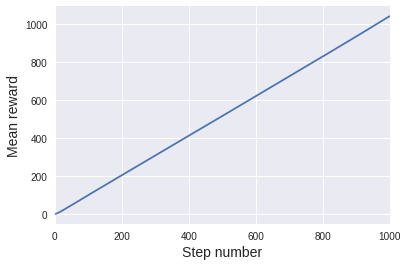

In [135]:
plt.xlabel('Step number', fontsize = 14)
plt.ylabel('Mean reward', fontsize = 14)
sns.tsplot(greedy_data / n_steps, [i for i in range(T)])

#### $\varepsilon$-жадная стратегия ($\varepsilon$-greedy policy)
Проблема предыдущего подхода в том, что он лишь жадным образом пытается эксплуатировать среду. Однако какое-то время необходимо тратить также на ее изучение, чтобы максимизировать премию в долгосрочном периоде. Таким образом идет речь о балансе *exploration/exploitation*.

Возможная модификация предыдущего подхода:
$$\pi_t(a)=\frac{1-\varepsilon}{|\mathcal{A}_t|}[a \in A_t] + \frac{\varepsilon}{|\mathcal{A}|},\ \varepsilon \in [0, 1]$$



**Задание**
1. Реализуйте данную стратегию
2. Что происходит с ростом $\varepsilon$?
3. Как бы изменяли $\varepsilon$ по мере обучения агента?
4. Опробуйте жадную и $\varepsilon$-жадную стратегии на модельной задаче. Попробуйте разные $\varepsilon$.

In [34]:
class EpsGreedyAgent(Agent):
    """ 
    Implementation of Epsilon Greedy Policy agent
    """
    def __init__(self, Model, epsilon):
        self.model = Model
        self.q_function = np.zeros((self.model.actions))
        self.epsilon = epsilon

    def get_policy(self):
        policy = np.full((self.model.actions), self.epsilon / self.model.actions)
        best_actions = self.argmax(self.q_function)
        for elem in best_actions:
            policy[elem] += (1 - self.epsilon)/len(best_actions)
        return policy

In [35]:
T = 1000
n_steps = 1000

cpu = mp.cpu_count()

greedy_policy_data = []
for epsilon in range(0, 11):
    reward_mean_data = np.zeros(T)
    for n_step in tqdm(range(0, n_steps, cpu)):
        base_model = BasicModel(20)
        eps_greedy_agent = EpsGreedyAgent(base_model, epsilon * 0.1)

        temp_reward_one_game = np.zeros(T)
        cur_reward = 0
        
        pool = mp.Pool(processes=cpu)
        args = repeat((eps_greedy_agent, T), cpu)
        results = pool.map(parralel_game,  args)
        reward_mean_data += np.array(results).sum(axis=0)
        pool.close()
        
    greedy_policy_data.append(reward_mean_data)

100%|██████████| 125/125 [00:21<00:00,  6.07it/s]


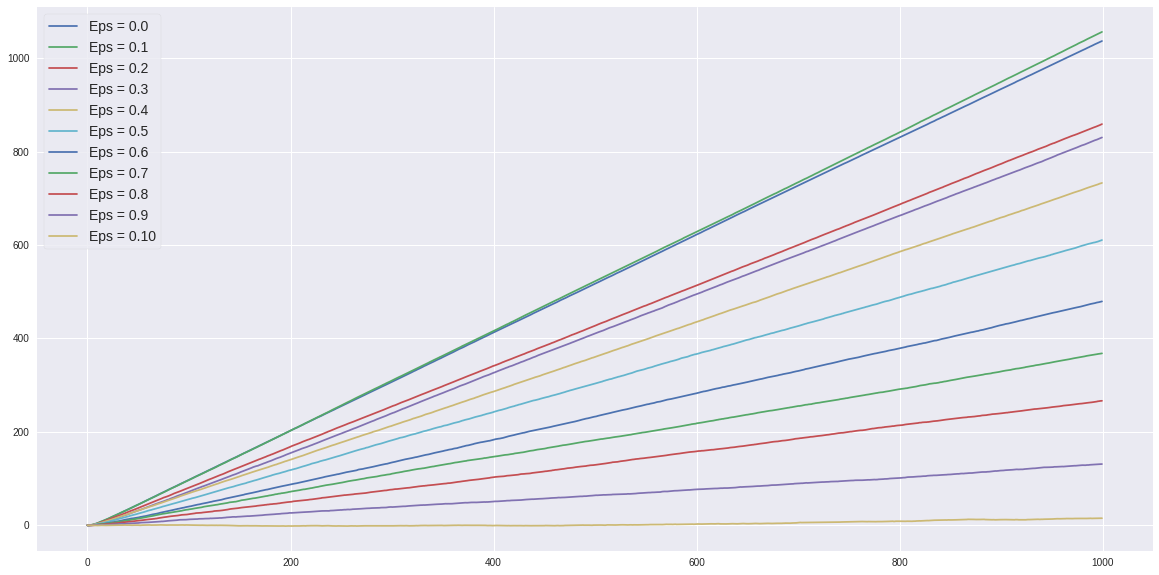

In [36]:
plt.figure(figsize=(20,10))
for elem in range(11):
    plt.plot([i for i in range(T)], greedy_policy_data[elem]/n_steps, label='Eps = 0.' + str(elem ))
plt.legend(fontsize=14, frameon=True)

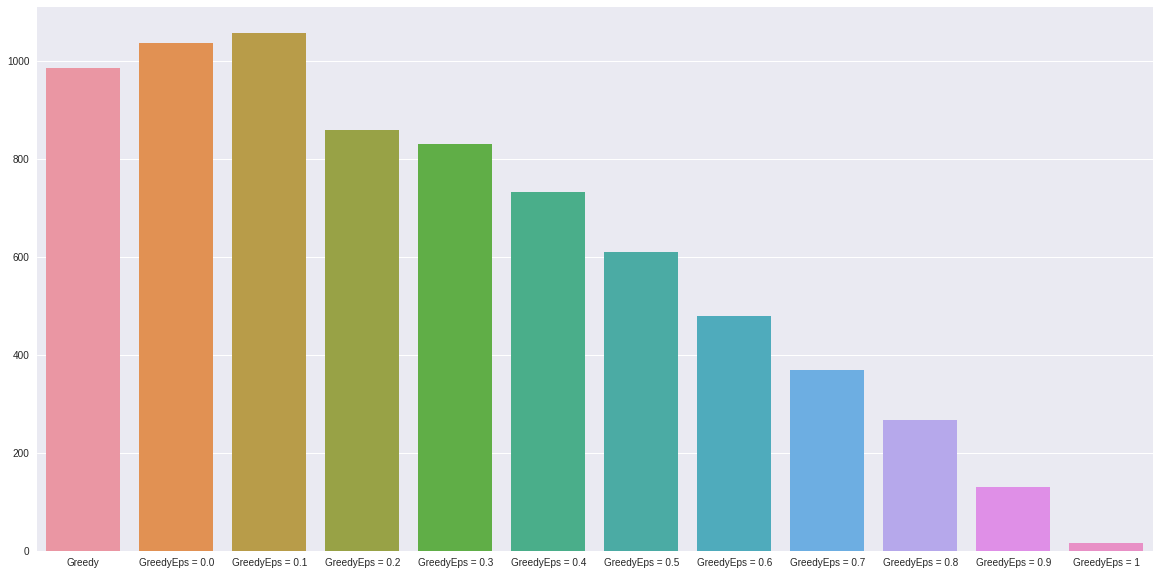

In [37]:
comparison = [greedy_data/n_steps]
for elem in greedy_policy_data:
    comparison.append(elem / n_steps)
max_values = np.array(list(map(np.max, comparison)))

x = ['Greedy']
for eps in range(0, 10):
    x.append('GreedyEps = 0.' + str(eps))
x.append('GreedyEps = 1')

plt.figure(figsize=(20,10))
sns.barplot(x, max_values)

Общая тенденция с увеличением $ Eps $ - падение среднего уровня награды.

Лучшим способом выбрать $ Eps $, монотонно менять его в процессе обучения с 1 до 0. Такая стратегия позволить сначала хорошо изучить среду, а только после этого применить уже готовую стратегию.

#### Softmax

Другая интерпретация $\varepsilon$-жадной стратегии
$$\pi_t(a)=\frac{\exp(\frac{1}{\varepsilon} \cdot Q_t(a))}{\sum_{b} \exp(\frac{1}{\varepsilon} \cdot Q_t(b))},\ \varepsilon > 0$$

**Задание**
1. Реализуйте данную стратегию
2. Что происходит, если $\varepsilon$ стремится к $0$? А бесконечности?
3. Сравните softmax и $\varepsilon$-жадную стратегии на модельной задаче.

In [41]:
class SoftmaxAgent(Agent):
    """ 
    Implementation of Softmax Epsilon Policy agent
    """
    def __init__(self, Model, epsilon):
        self.model = Model
        self.q_function = np.zeros((self.model.actions))
        self.epsilon = epsilon
        
    def get_policy(self):
        policy = np.exp((1/self.epsilon) * (self.q_function))
        policy = policy / policy.sum()
        return policy

In [46]:
T = 1000
n_steps = 1000

cpu = mp.cpu_count()

softmax_policy_data = []
for epsilon in range(1, 11):
    reward_mean_data = np.zeros(T)
    for n_step in tqdm(range(0, n_steps, cpu)):
        base_model = BasicModel(20)
        softmax_agent = SoftmaxAgent(base_model, epsilon * 0.1)

        temp_reward_one_game = np.zeros(T)
        cur_reward = 0
        
        pool = mp.Pool(processes=cpu)
        args = repeat((softmax_agent, T), cpu)
        results = pool.map(parralel_game,  args)
        reward_mean_data += np.array(results).sum(axis=0)
        pool.close()
        
    softmax_policy_data.append(reward_mean_data)

100%|██████████| 125/125 [00:16<00:00,  7.96it/s]


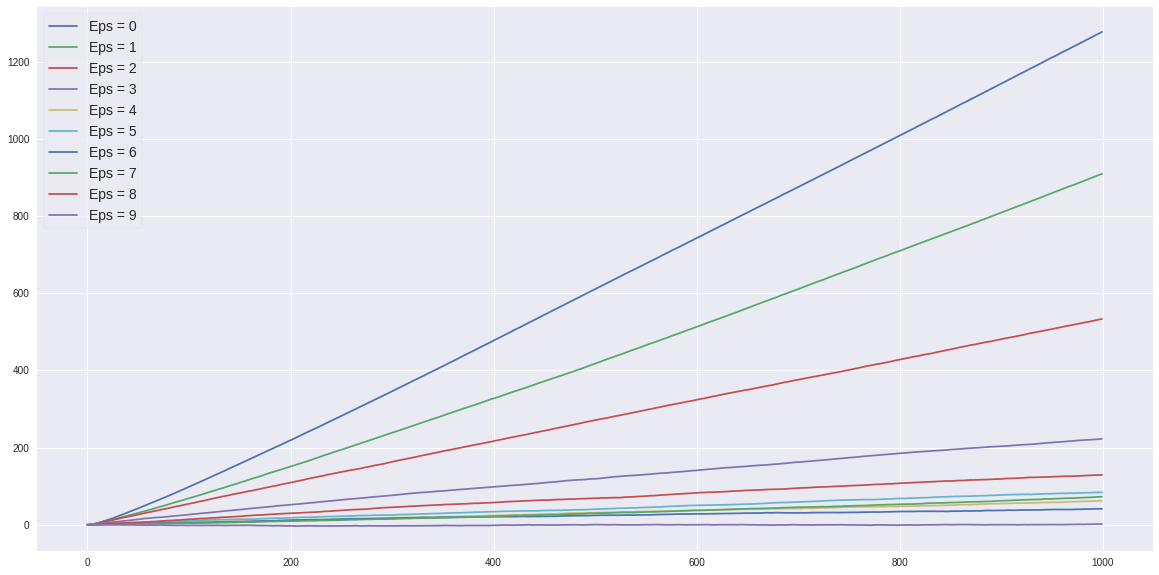

In [47]:
plt.figure(figsize=(20,10))
for elem in range(10):
    plt.plot([i for i in range(T)], softmax_policy_data[elem] / n_steps, label='Eps = ' + str(elem ))
plt.legend(fontsize=14, frameon=True)

При стремлении $Eps$ к бесконечности агент все меньше будет учитывать свой накопленный опыт и будет сходиться к случайному, при стремлении же к $0$, получим ровно противоположный результат.

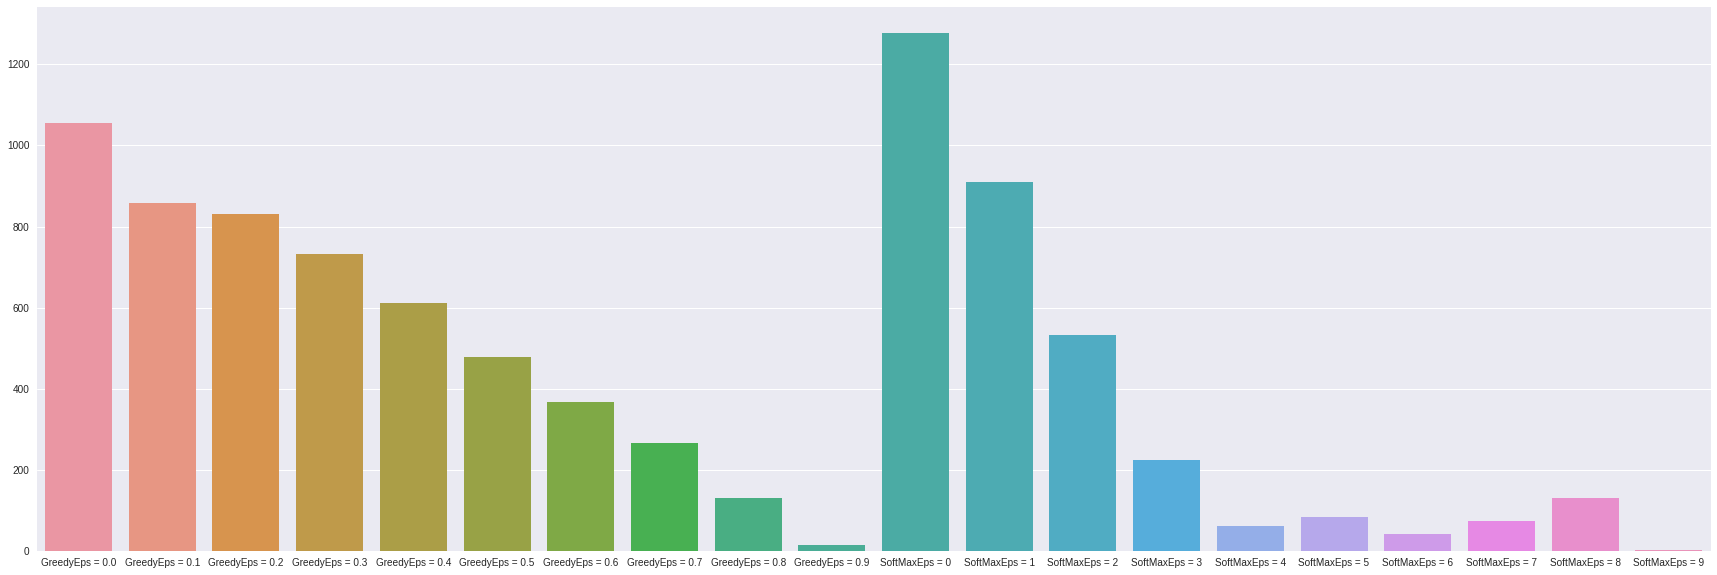

In [48]:
comparison = []
for elem in greedy_policy_data[1:]:
    comparison.append(elem / n_steps)
    
for elem in softmax_policy_data:
    comparison.append(elem / n_steps)

max_values = np.array(list(map(np.max, comparison)))

x = []
for eps in range(0, 10):
    x.append('GreedyEps = 0.' + str(eps))
#x.append('GreedyEps = 1')

for eps in range(0, 10):
    x.append('SoftMaxEps = ' + str(eps))
#x.append('SoftMaxEps = 1')

plt.figure(figsize=(30,10))
sns.barplot(x, max_values)

#### Метод UCB (upper confidence bound)
Предложенный ниже алгоритм в некотором смысле является оптимальным, подробнее об этом [здесь]( http://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf). Для каждого момента $t$ он определяет множество наиболее потенциально выгодных действий. Выбор $a$ из $A_t$ происходит равновероятно.

$$\mathcal{A}_t = \arg\max Q_t(a) + \varepsilon \sqrt{\frac{2 \ln t}{c_t(a)}},\ \varepsilon \geq 0$$

Первая часть нам уже знакома, а вот вторую часть можно воспринимать, как величину, показывающую, насколько точна наша оценка $Q_t(a)$. Стратегия сама пытается найти баланс между *exploration/exploitation*.

**Задание**
1. Реализуйте данную стратегию
2. Что происходит, если $\varepsilon$ увеличивается?
3. На модельной задаче сравните лучшую версию $softmax$, $\varepsilon$-жадную стратегии и UCB метод.

In [49]:
class UCBAgent(Agent):
    """ 
    Implementation of UCB agent
    """
    def __init__(self, Model, epsilon):
        self.model = Model
        self.q_function = np.random.uniform(size = self.model.actions)
        self.epsilon = epsilon
        self.action_times = np.zeros((self.model.actions)) + 1e-8
    def choose_action(self, time):
        action = self.q_function + self.epsilon * (np.sqrt(2 * np.log(time))/np.sqrt(self.action_times))
        action = self.argmax(action)
        choosen_action = np.random.randint(0, action.size)
        self.action_times[action[choosen_action]] += 1
        return action[choosen_action]

In [50]:
T = 1000
n_steps = 1000

cpu = mp.cpu_count()

ucb_policy_data = []
for epsilon in tqdm(range(1, 11)):
    reward_mean_data = np.zeros(T)
    for n_step in range(0, n_steps, cpu):
        base_model = BasicModel(20)
        ucb_agent = UCBAgent(base_model, epsilon * 0.1)

        temp_reward_one_game = np.zeros(T)
        cur_reward = 0
        
        pool = mp.Pool(processes=cpu)
        args = repeat((ucb_agent, T), cpu)
        results = pool.map(parralel_game,  args)
        reward_mean_data += np.array(results).sum(axis=0)
        pool.close()
        
    ucb_policy_data.append(reward_mean_data)

100%|██████████| 10/10 [02:38<00:00, 15.92s/it]


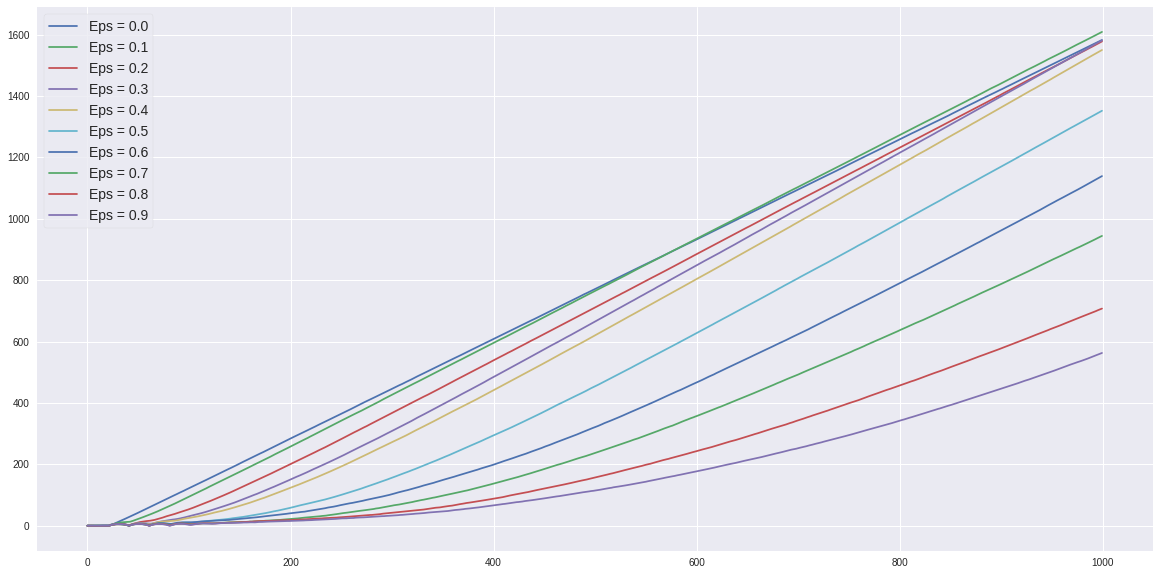

In [51]:
plt.figure(figsize=(20,10))
for elem in range(10):
    plt.plot([i for i in range(T)], ucb_policy_data[elem] / n_steps, label='Eps = 0.' + str(elem))
plt.legend(fontsize=14, frameon=True)

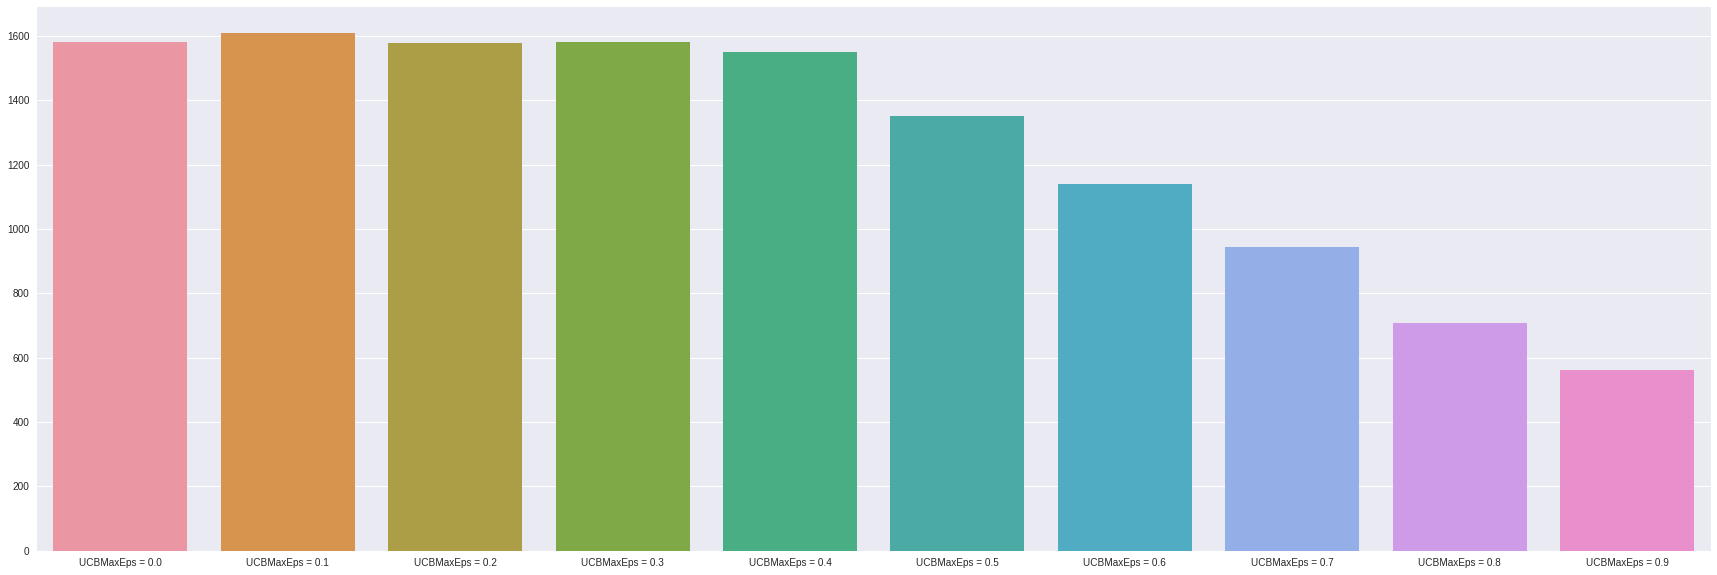

In [52]:
comparison = []
for elem in ucb_policy_data:
    comparison.append(elem / n_steps)
    

max_values = np.array(list(map(np.max, comparison)))

x = []


for eps in range(0, 10):
    x.append('UCBMaxEps = 0.' + str(eps))

plt.figure(figsize=(30,10))
sns.barplot(x, max_values)

При стремлении $Eps$ к бесконечности наибольшую важность принимает то, сколько раз агент дергал ручку конкретного автомата, одновременно с этим же склонность к изучению снижается.

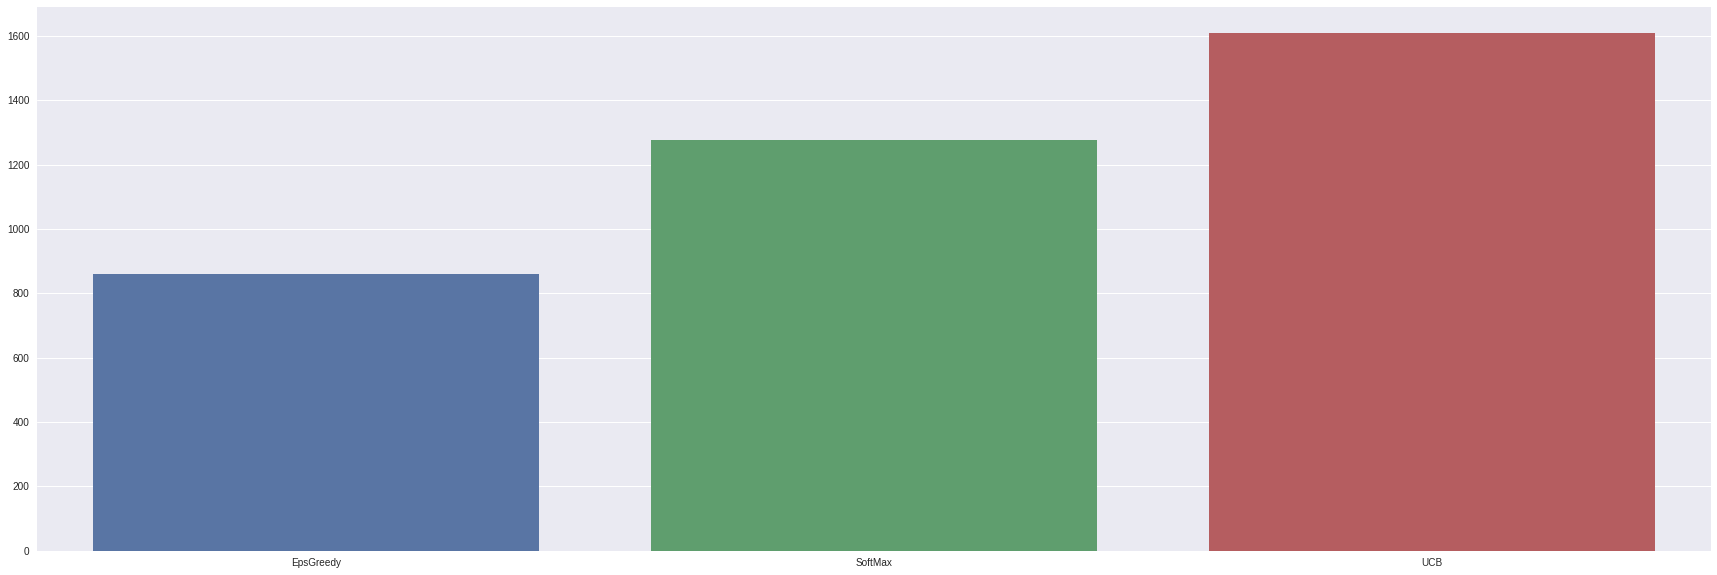

In [54]:
comparison = [greedy_policy_data[2] / n_steps, softmax_policy_data[0] / n_steps, ucb_policy_data[1] / n_steps]

max_values = np.array(list(map(np.max, comparison)))

x = ['EpsGreedy', 'SoftMax', 'UCB']

plt.figure(figsize=(30,10))
sns.barplot(x, max_values)

#### Градиентный метод (gradient bandit policy)

Существуют еще так называемые адаптивные стратегии. Они могут быть использованы, если среда не является стационарной (распределение премий может меняться). В таком случае предлагается использовать уже знакомое нам экспоненциальное сглаживание.

Мы подсчитываем среднюю сглаженную премию к моменту $t$ по всем действиям ($\alpha$ регулирует глубину истории):
$$\bar{r}_{t+1} = (1-\alpha_t)\cdot\bar{r}_t(a)+\alpha_t r_{t+1} = \bar{r}_t +\alpha_t (r_{t+1}-\bar{r}_t(a)),\ \alpha_t \in [0, 1]$$

**Замечание**
Нужно все же сказать о сходимости подобных вещей, условие следующее:
* $\sum^{\infty} \alpha_t = \infty$
* $\sum^{\infty} \alpha^2_t < \infty$

Кстати, если взять  $\alpha_t = \frac{1}{t}$, то получится просто среднее значение всех $r$. Это подсказка на самое первое задание.

Для каждого действия у нас есть приоритет $p_t(a)$. После очередного шага идет корректировка с шагом $\lambda$. Если было выбрано действие $a$, то
$$p_{t+1}(a) = p_t(a)+\lambda(r_t-\bar{r}_t)(1-\pi_t(a))$$
в ином случае
$$p_{t+1}(a) = p_t(a)-\lambda(r_t-\bar{r}_t)\pi_t(a)$$

Тогда стратегия на момент $\pi_{t+1}$ будет выглядеть так:
$$\pi_{t+1}(a) = \frac{\exp(p_{t+1}(a))}{\sum_{b} \exp(p_{t+1}(b))}$$
Подробное обоснование метода вы можете найти в книге.


**Задание**
1. Реализуйте данную стратегию.
2. Покажите, какая из описанных моделей ведет себя лучше на модельной задаче.

In [57]:
class GradientAgent(Agent):
    """
    Implementation of Gradient Bandit Policy agent
    """
    def __init__(self, Model, alpha, gamma):
        self.model = Model
        self.q_function = np.zeros((self.model.actions))
        self.alpha = alpha
        self.priority = np.zeros((self.model.actions)) + 1e-8
        self.mean_reward = 0
        self.gamma = gamma
        
        
    def get_policy(self):
        policy = np.exp(self.priority)/(np.exp(self.priority)).sum()
        return policy
        
    def correct_strategy(self, cur_reward, action):
        chosen_action_priority = self.priority[action] + self.gamma * (cur_reward - self.mean_reward) * (1 - self.get_policy()[action])
        
        self.priority -= self.gamma * (cur_reward - self.mean_reward) * self.get_policy() 
        self.priority[action] = chosen_action_priority
        
        self.mean_reward += self.alpha * (cur_reward - self.mean_reward)

In [61]:
T = 1000
n_steps = 1000

cpu = mp.cpu_count()

gradient_policy_data = []
for alpha in tqdm(range(1, 11)):
    for gamma in range(1, 11):
        reward_mean_data = np.zeros(T)
        for n_step in range(0, n_steps, cpu):
            base_model = BasicModel(20)
            gradient_agent = GradientAgent(base_model, alpha * 0.1 ,  gamma * 0.1)

            temp_reward_one_game = np.zeros(T)
            cur_reward = 0

            pool = mp.Pool(processes=cpu)
            args = repeat((gradient_agent, T), cpu)
            results = pool.map(parralel_game,  args)
            reward_mean_data += np.array(results).sum(axis=0)
            pool.close()

        gradient_policy_data.append(reward_mean_data)

100%|██████████| 10/10 [37:11<00:00, 225.33s/it]


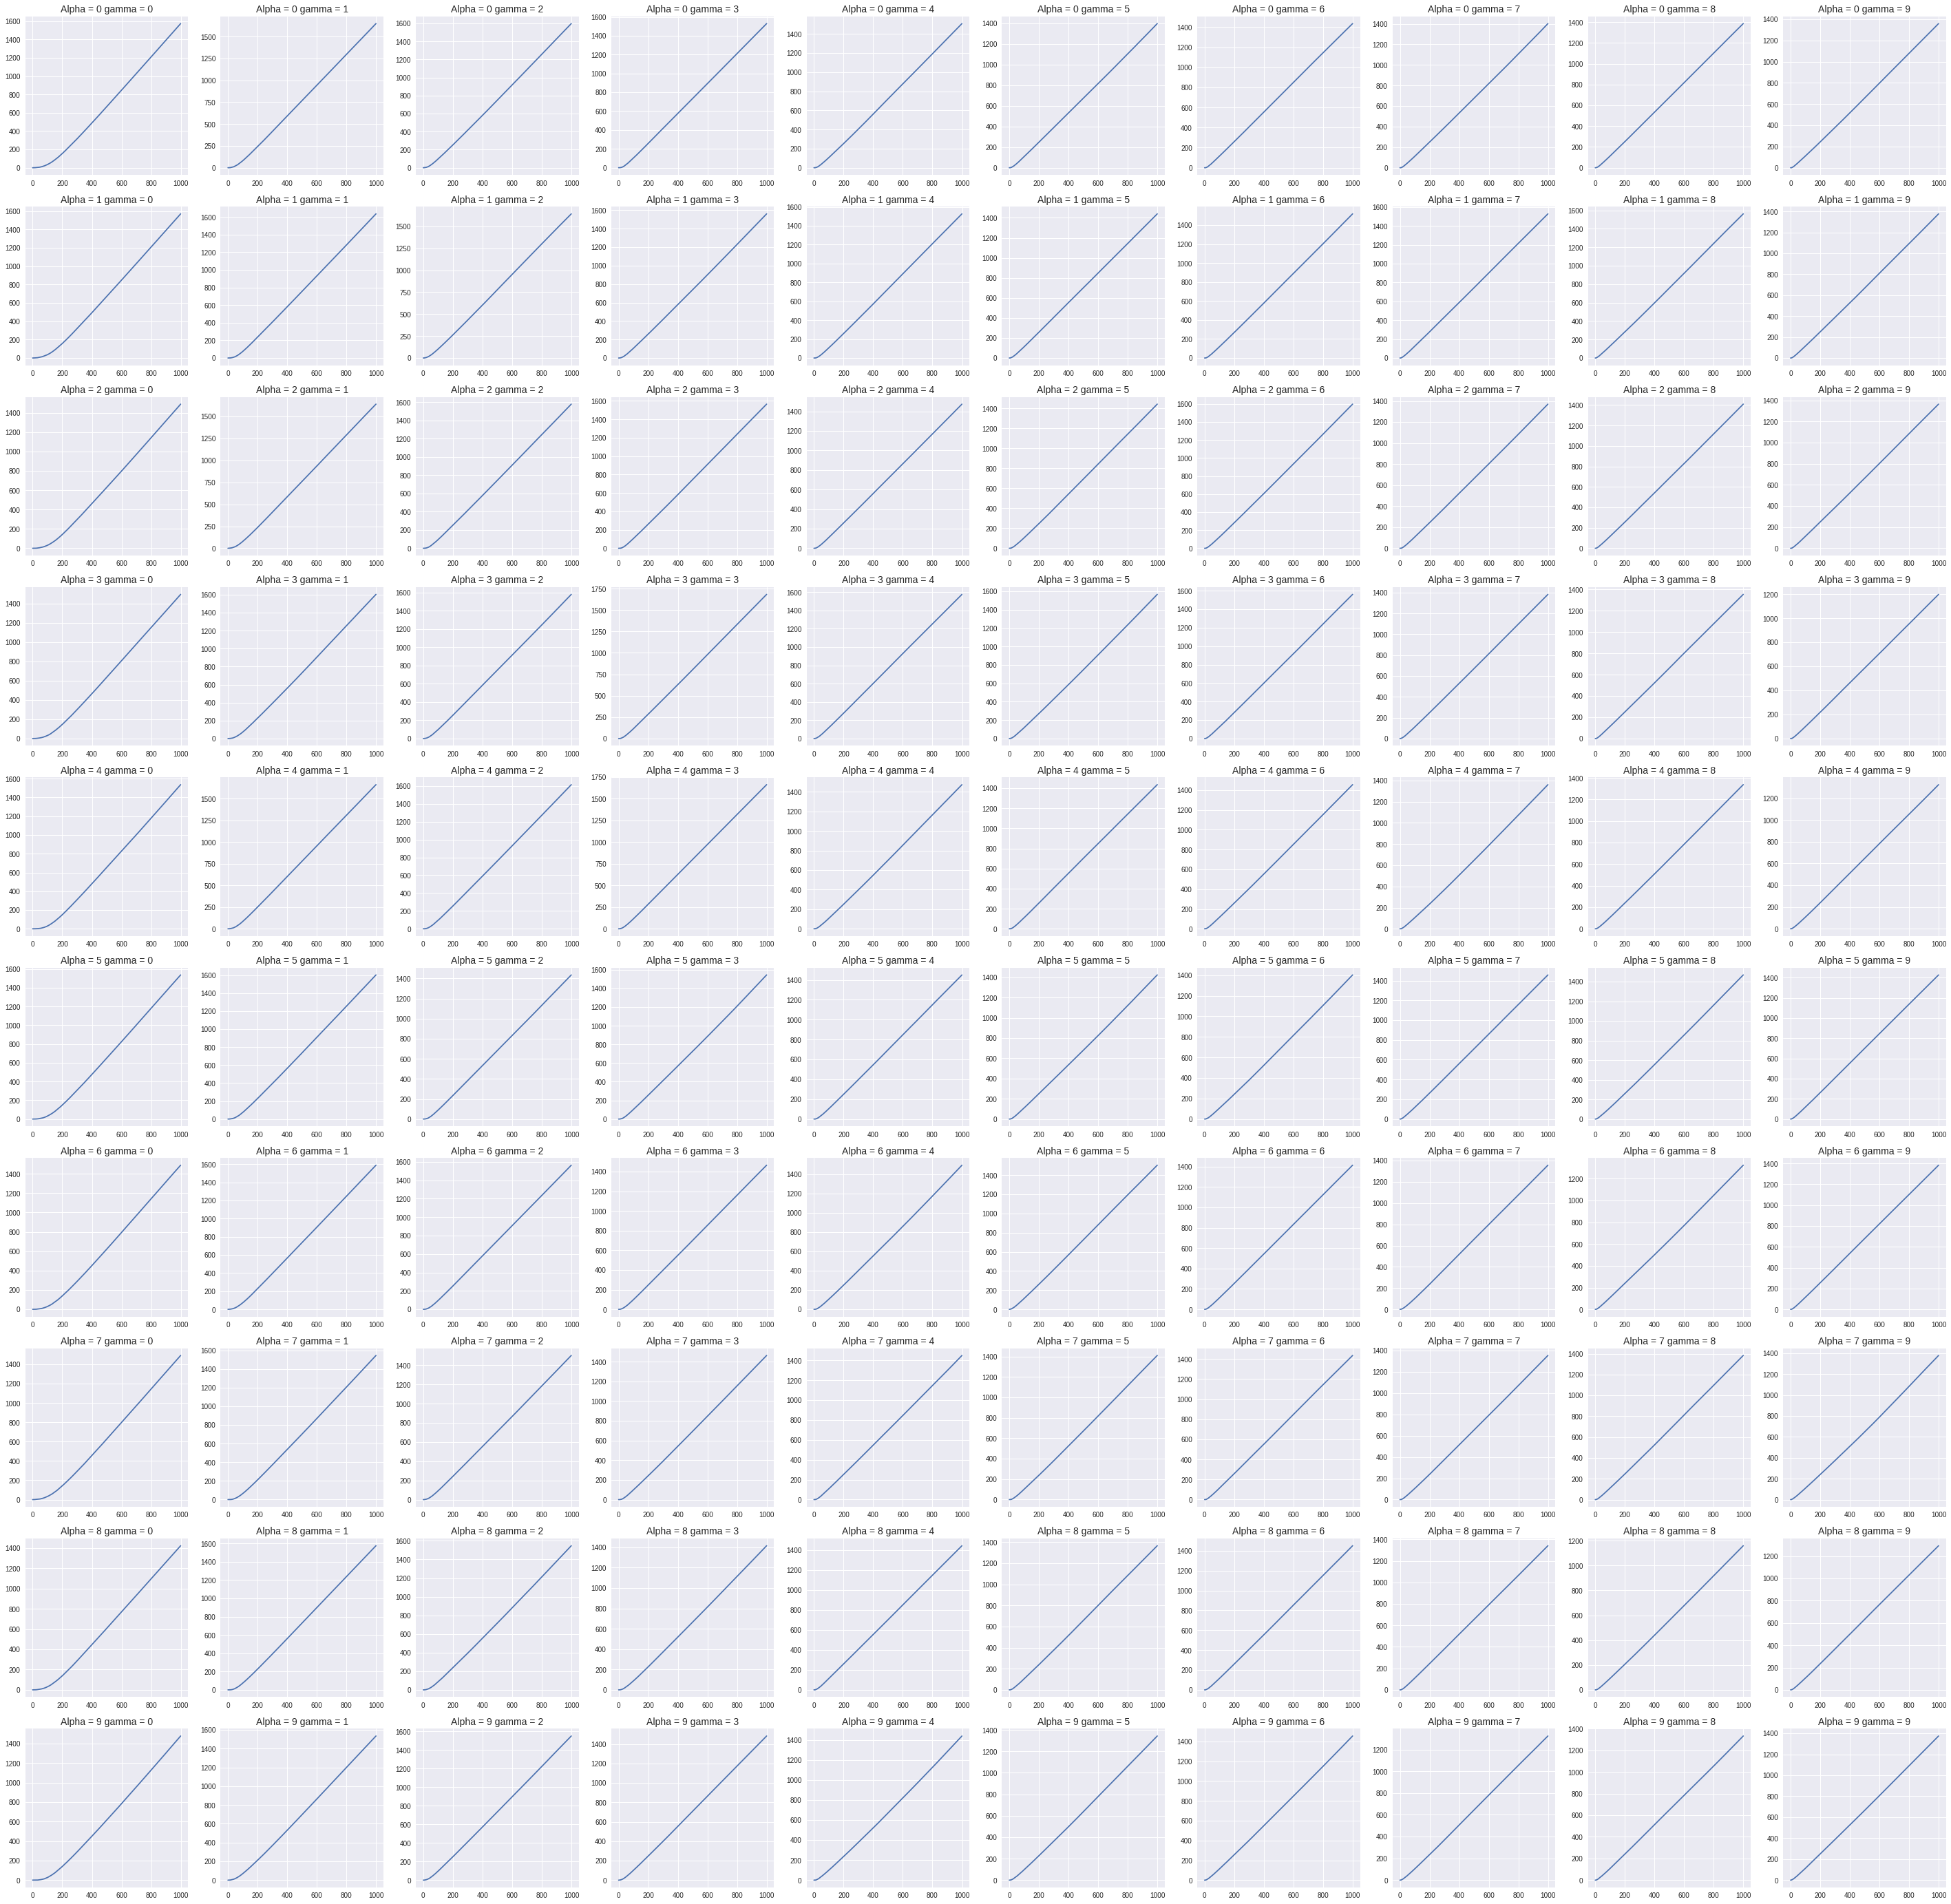

In [62]:
f, axarr = plt.subplots(10, 10, figsize=(50, 50))

for alpha in range(10):
    for gamma in range(10):
        axarr[alpha, gamma].plot([i for i in range(T)], gradient_policy_data[alpha * 10 + gamma]/n_steps)
        axarr[alpha, gamma].set_title("Alpha = " + str(alpha) + " gamma = " + str(gamma), fontsize=14)

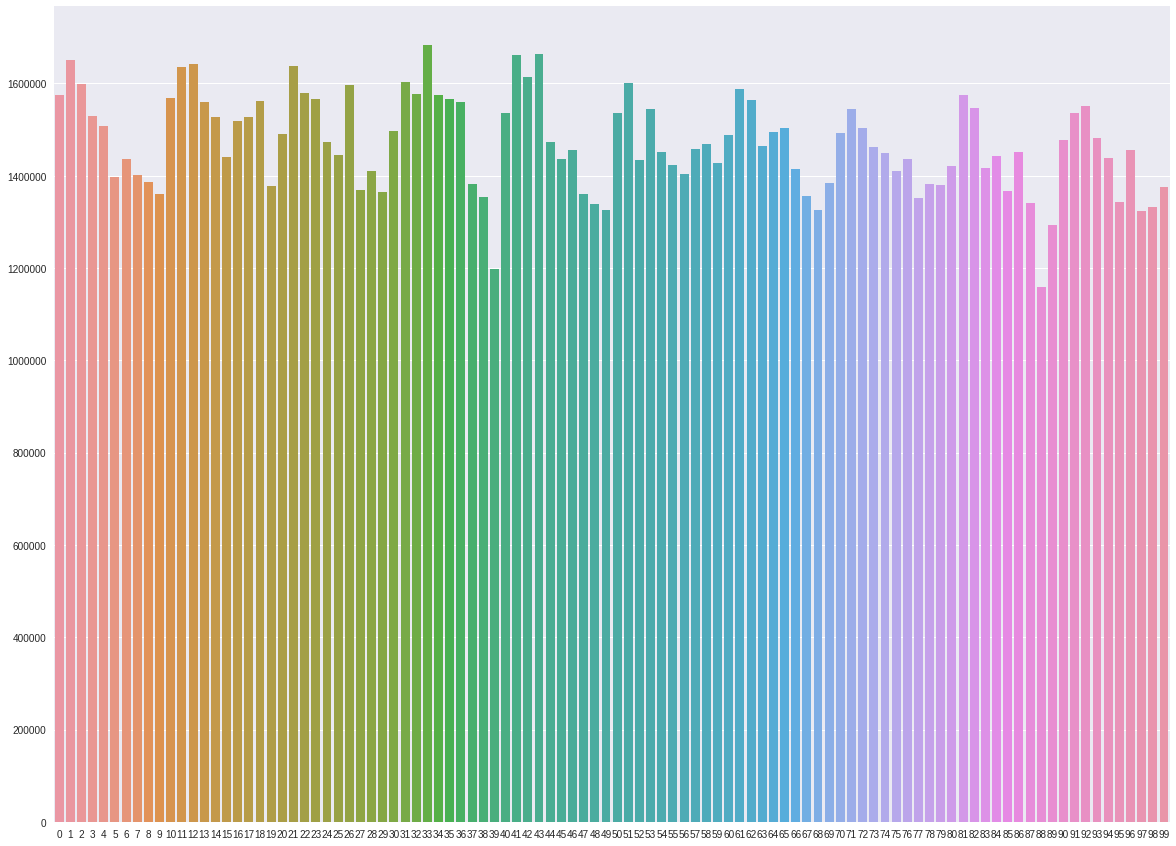

In [68]:
comparison = []

for elem in gradient_policy_data:
    comparison.append(elem)

max_values = np.array(list(map(np.max, comparison)))

x = [i for i in range(len(gradient_policy_data))]

plt.figure(figsize=(20,15))
sns.barplot(x, max_values)

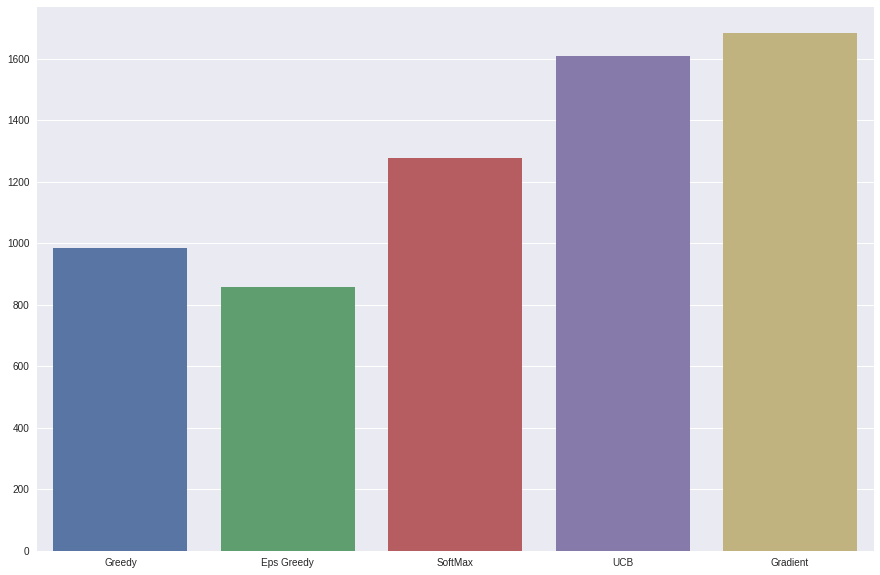

In [66]:
comparison = [greedy_data/n_steps, greedy_policy_data[2] / n_steps,
              softmax_policy_data[0] / n_steps,
              ucb_policy_data[1] / n_steps, gradient_policy_data[33]/n_steps]

max_values = np.array(list(map(np.max, comparison)))

x = ['Greedy', 'Eps Greedy', 'SoftMax', 'UCB', 'Gradient']

plt.figure(figsize=(15,10))
sns.barplot(x, max_values)

### Дальнейшее чтение
Существует также задача многорукого бандита с контекстом (contextual bandits), формальная постановка выглядит следующим образом.
* $\mathcal{A}$ - множество допустимых действий
* $X$ - пространство контекстов среды
* $p(r|a, x)$ - распределение премии для действия $a$ в условиях контекста $x$
* $\pi_t(a|x)$ - стратегия агента на момент $t$ в условиях контекста $x$.

Пример использования такой модели при показе новостей [здесь](http://www.research.rutgers.edu/~lihong/pub/Li10Contextual.pdf).

## 2. Марковский процесс принятия решения (markov decison process)

### Постановка задачи

Пусть есть среда с конечным множество состояний $\mathcal{S}$. В момент времени $t$ агент, находясь в состоянии $s_t$, может выбрать произвольное действие $a_t \in \mathcal{A}_{s_t} \subset \mathcal{A}$. После чего среда переходит в состояние $s_{t+1}$ и агент получает награду $r_{t+1}$. Поведение среды задается распределением

$$p(s_{t+1}, r_{t+1}|s_t, a_t)  = \Pr\{ S_{t+1} = s_{t+1}, R_{t+1} =  r_{t+1} | S_t = s_t, A_t = a_t\}.$$

Агент обладает некоторой стратегией $\pi$, которая на шаге $t$ задает вероятности выбора действия $a_t \in \mathcal{A}_{s_t}$ для состояния $s_t$ $\pi_t(a_t|s_t) = p(a_t|s_t)$.

Неформально задача агента - максимизировать суммарную награду. Если процесс принятия решения конечный, то ее можно просто формализовать, как максимизацию величины
$$G = \sum_{t=0}^{T} R_{t+1},$$

где $T$ - момент времени, когда мы попали в какое-то конечное (терминальное) состояние, в данном контексте стоит воспринимать, как случайную величину. Если же процесс может длиться очень долго или бесконечно, то мы имем дело с диксконтированной  наградой
$$ G_t = \sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1},$$
здесь $\gamma \in [0, 1]$ определяет на сколько далеко по времени мы смотрим в будущее.

**Замечания**

1. Если предположить, что попав в конечное состояние, то мы вегда остаемся в нем и в дальнейшем получаем только нулевую награду, то положив $\gamma = 1$, можно получить первый вариант определения.
2. "Марковость" процесса заключается в том, что среда изменяется и выдает награду только на основе текущего состояния и последнего действия агента.

**Задание**
1. Привидите жизненный пример марковского процесса принятия решения (это может быть какаю-нибудь игра и т.п.).
2. Можете ли вы привести пример игры, где принятие решения нельзя смоделировать с помощью марковского процесса?
3. Выведите следующие значения через $p(s_{t+1}, r_{t+1}|s_t, a_t)$, для простоты все распределения можно считать дискретными
  * $r(s_{t}, a_{t}) = \mathbb{E}[R_{t+1}|S_t = s_t, A_t = a_t]$ - средняя награда за действие $a_t$ в $s_t$ 
  * $p(s_{t+1} | s_t, a_t) = \Pr\{S_{t+1} = s_{t+1} | S_t = s_t, A_t = a_t \}$ - вероятность попасть в $s_{t+1}$ из $s_t$, сделав $a_t$.
  * $r(s_t, a_t, s_{t+1}) = \mathbb{E}[R_{t+1}|S_{t+1} = s_{t+1}, S_t = s_t, A_t = a_t]$ - средняя награда при переезде из $s_t$ в $s_{t+1}$, сделав $a_t$.

1) Перемещение студента по городу в течение дня (Дом - Университет - Дом).

2) Игра в города с запретом повторять уже сказанные города.

 1 - $r(s_{t}, a_{t}) = \mathbb{E}[R_{t+1}|S_t = s_t, A_t = a_t] = \sum_{s_{t}}\sum_{r_{t}}r_{t}\cdot p(s_{t}, r_{t}|s_t, a_t)$

   2 - $p(s_{t+1} | s_t, a_t) = \Pr\{S_{t+1} = s_{t+1} | S_t = s_t, A_t = a_t \} = \sum_{r_{t}}p(s_{t+1}, r_{t+1}|s_t, a_t)$
   
   3 - $r(s_t, a_t, s_{t+1}) = \mathbb{E}[R_{t+1}|S_{t+1} = s_{t+1}, S_t = s_t, A_t = a_t] = \sum_{r_{t}} r \cdot p(s_{t+1}, r_{t+1}|s_t, a_t)$

### Основные понятия

Ценность состояния (state-value function) при стратегии $\pi$, это награда, которую мы получим в дальнешем, стартуя из него

$$V^\pi(s) = \mathbb{E}[G_t|S_t=s] = \mathbb{E}\Big[\sum_{k=0}^{\infty} \gamma^{k+1}R_{t+k+1}|S_t=s\Big].$$

Ценности действия (action-value function) $a$ в состоянии $s$, это также дальнейшая награда, которую мы получим при стратегии $\pi$
$$Q^\pi(s, a) = \mathbb{E}[G_t|S_t=s, A_t=a] = \mathbb{E}\Big[\sum_{k=0}^{\infty} \gamma^{k+1}R_{t+k+1}|S_t=s,  A_t=a\Big].$$

Прим этом верны следующие тождества:

$$V^{\pi}(s) = \mathbb{E}\big[R_{t+1} + \gamma V^{\pi}(S_{t+1}) | S_t=s\big]$$

$$Q^{\pi}(s, a) = \mathbb{E}\big[R_{t+1} + \gamma Q^{\pi}(S_{t+1}, A_{t+1}) | S_t=s, A_t=a\big]$$

$$Q^{\pi}(s, a) = \mathbb{E}\big[R_{t+1} + \gamma V^{\pi}(S_{t+1}) | S_t=s, A_t=a\big]$$

Первы два являются уравнениямит Беллмана (Bellman equation).

**Замечание**
Важно отметить, в этих определениях стратегия $\pi$ фиксирована и не меняется со временем. Хотя очевидно, что на реальной практике это не так, потому что наша стратегия постоянно дообучается по мере изучения среды.

Мы будем считать стратегию $\pi^{*}$ оптимальной, если для любого состояния $s$ и любой другой стратегии $\pi$ верно $V_{\pi^{*}}(s) \geq V_{\pi}(s)$. Таких стратегий может быть несколько, однако функции $V(s)$ и $Q(s, a)$, которые они определяют, будут одинаковыми. Эти функции мы и обозначим, как оптимальные $V^*(s)$ и $Q^*(s, a)$.

Прим этом существует уравнение оптимальности Беллмана (Bellman optimality equation), подробнее [здесь](https://en.wikipedia.org/wiki/Bellman_equation):

$$V^*(s) = \max_{a \in \mathcal{A}} \mathbb{E}\big[R_{t+1} + \gamma V^*(S_{t+1}) | S_t=s, A_t=a\big]$$

$$Q^*(s, a) = \mathbb{E}\big[R_{t+1} + \gamma \max_{b \in \mathcal{A}} Q^*(S_{t+1}, b) | S_t=s, A_t=a\big]$$

Тогда следующие две жадные стратегии являются эквивалентными и оптимальными ($\mathcal{A}_t$ - множество):
$$\mathcal{A}_t = \arg\max_{a \in \mathcal{A}} \mathbb{E}\big[R_{t+1} + \gamma V^*(s_{t+1}) | s_t, a \big]$$
$$\mathcal{A}_t = \arg\max_{a \in \mathcal{A}} Q^*(s_t, a)$$

### Динамическое программирование (Dynamic programming)

Материал этой части строится на том, что $p(s',r|s,a)$ известна. Это пригодится нам для дальнейшего понимания.
#### Вычисление $V^{\pi}(s)$ (iterative policy evaluation)

Пусть есть некоторая фиксированная стратегия $\pi$, тогда для функции $V^{\pi}$ справедлива рекуррентная формула

$$V^{\pi}(s) = \sum_a \pi(a|s) \sum_{s',r} p(s',r|s,a) \big[r + \gamma V^{\pi}(s') \big]$$

Для простоты записи формул мы предполагаем, что распределение наград является дискретной случайной величиной. В ином случае необходимо использовать оператор интегрирования вместо суммы. Таким образом мы поможем вычислить функцию $V^{\pi}$ для каждого состояния $s$ используя итерационный алгоритм, инициализировав $V_0$ случайно

$$V_{n+1}(s) = \sum_a \pi(a|s) \sum_{s',r} p(s',r|s,a) \big[r + \gamma V_n(s') \big]$$

Кстати, если есть конечные состояния, то для них  $V(s)$ уже известно и эти значения стоит использовать при инициализации для более быстрой сходимости. Вычисления останавливаются, когда изменение функции $V(s)$ от итерации к итерации стало незначительным.

**Замечание**
1. Мы делаем предположение, что $p(s',r|s,a)$ нам известно, что на практике частно не так.
2. Вычисления $V_{n+1}$ можно делать *in place*, что только ускоряет сходимость, так как в процессе вычисления мы будем использовать, как значения из итерации $n$ так и какие-то новые значения из итерации $n+1$.

#### Улучшения стратегии $\pi$ (policy improvement theorem)
Пусть есть две стратегии $\pi$ и $\pi'$, при этом известно, что для любого состояния $s$ верно, что 
$$Q^{\pi}(s, \pi'(s)) \geq V^{\pi}(s),$$
то тогда справедливо неравенство
$$V^{\pi'}(s) \geq V^{\pi}(s).$$

Весь интерес данной теоремы заключается в том, что она позволяет нам улучшать текущую стратегию. Мы умеем вычислять $V^{\pi}(s)$, тогда 

$$
Q^{\pi}(s, a) =
\mathbb{E}\big[R_{t+1} + \gamma V^{\pi}(S_{t+1}) | S_t=s, A_t=a\big] =
\sum_{s',r}p(s',r|s, a)\big[ r + \gamma V^{\pi}(s') \big]
$$

Это позволяет нам улучшать стратегию

$$\pi'(s) = \arg\max_a Q^{\pi}(s, a).$$
Эта запись означает, что мы распределяем вероятность между множеством состояний, вычисленных в правой части. Если мы не можем улучить $V^{\pi'}$ относительно $V^{\pi}$, то значит функция ценности состояния оптимальна, так как удовлетвояют уравнению Беллмана, а значит оптимальна и стратегия.

#### Метод итерации стратегий (policy interation) 
Таким образом, совершая поочередно вычисление $V^{\pi}$ и улушчение $\pi$, найдем $\pi^*$. Обычный итеративный алгоритм с двумя этапами. Стоити отметить, что в качестве инициализции значений функции $V(s)$ можно использовать значения для предыдущей стратегии, это значительно ускоряет сходимость алгоритма.

#### Метод итерации ценности состояний (value interation) 
Также существует достаточно интересный подход для вычисления оптимальной $V^{*}(s)$, а значит и нахождения оптимальной стратегии.

$$V_{n+1}(s) = \max_a \sum_{s',r} p(s',r|s,a) \big[r + \gamma V_n(s') \big].$$

Относится к этому алгоритму можно по разному. Во-первых, его можно воспринимать, как то, что в методе итерации стратегий при вычисление $V^{\pi}$ мы не ждем сходимости, делаем одну итерацию, а затем сразу подправляем стратегию. С другой стороны по сути мы выписали уравнение оптимальности Беллмана и используем его в качестве итеративного алгоритма. К этому методу стоит относится именно, как к практическому.

**Задание**
1. Смоделируйте некоторую среду. Пусть будет 100 состояний. Распределение функции $p(s',r|s,a)$ можете взять на свое усмотрение.
2. Зафиксируйте некоторе значение дисконтирования. Найдите лучшую стратегию.
3. Сравните сходимость метода итерации стратегий и итерации ценности состояний.
4. Выберете наиболее быстрый метод. Посмотрите, как меняется значение функции $V^*(s)$ в зависимоти от $\gamma$.
5. Постройте график $\gamma \times V^*(s)$ для 5 произвольных состояний.

In [69]:
class MDPModel(Model):
    def __init__(self):
        self.states_row = 10
        self.states_num = self.states_row ** 2
        self.max_actions = 4
        self.current_state = (0, 0)
        self.states = [[0 for i in range(10)] for j in range(10)]
        self.probability_reward_dist = [[np.random.normal() for i in range(10)] for j in range(10)]
        self.probability_reward_dist[np.random.randint(0, 10)][np.random.randint(0, 10)] = 100
        self.probability_reward_dist[np.random.randint(0, 10)][np.random.randint(0, 10)] = -100
        
        for i in range(1, 9):
            for j in range(1, 9):
                self.states[i][j] = [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)]
                
        for j in range(1, 9):
            self.states[0][j] = [(1, j), (1, j - 1), (1, j + 1)]
            self.states[9][j] = [(8, j), (9, j - 1), (9, j + 1)]
            
        for i in range(1, 9):
            self.states[i][0] = [(i - 1, 0), (i + 1, 0), (i, 1)]
            self.states[i][9] = [(i - 1, 9), (i + 1, 9), (i, 8)]
        
        self.states[0][0] = [(1, 0), (0, 1)]
        self.states[9][0] = [(8, 0), (9, 0)]
        self.states[0][9] = [(1, 9), (0, 8)]
        self.states[9][9] = [(8, 9), (9, 8)]
        
        self.trans_prob = [[[np.random.normal(0.25, 0.25) for k in range(len(self.states[i][j]))] for i in range(10)] for j in range(10)]
        self.q_function = [[[0 for k in range(len(self.states[i][j]))] for j in range(10)] for i in range(10)]
        
        
        for i in range(10):
            for j in range(10):
                sum = 0
                for k in range(len(self.states[i][j])):
                    sum += self.trans_prob[i][j][k]
                if sum < 1:
                    self.trans_prob[i][j][np.random.randint(0, len(self.states[i][j]))] += 1 - sum
        
        
    def get_reward(self, action):
        return self.probability_reward_dist[action[0]][action[1]]
    

In [70]:
class PolicyIterationAgent(Agent):
    def __init__(self, Model, gamma):
        self.model = Model
        self.gamma = gamma
        self.current_state = self.model.current_state
        self.values = np.zeros((self.model.states_row,
                                self.model.states_row))
        
        self.q_function = np.zeros((self.model.states_row,
                                                    self.model.states_row,
                                                    self.model.max_actions))
        
        self.policy = np.zeros((self.model.states_row,
                                self.model.states_row,
                                self.model.max_actions))
        
    def update_Q(self, time, cur_reward, action):   
        for action_choose in range(len(self.model.states[self.current_state[0]][self.current_state[1]])):
            temp_sum = 0
            for state in range(len(self.model.states[self.current_state[0]][self.current_state[1]])):
                new_trans = self.model.states[self.current_state[0]][self.current_state[1]][state]
                temp_sum += self.model.trans_prob[self.current_state[0]][self.current_state[1]][action_choose] * (cur_reward + self.gamma * self.values[new_trans[0]][new_trans[1]])
            
            self.q_function[self.current_state[0]][self.current_state[1]][action_choose] = temp_sum                                                                                                                                   
                                                                                                
        
    def correct_strategy(self, cur_reward, action):
        prob_sum = 0
        for action_choose in range(len(self.model.states[self.current_state[0]][self.current_state[1]])):
            temp_sum = 0
            for state in range(len(self.model.states[self.current_state[0]][self.current_state[1]])):
                new_trans = self.model.states[self.current_state[0]][self.current_state[1]][state]
                temp_sum += self.model.trans_prob[self.current_state[0]][self.current_state[1]][state] * (cur_reward + self.gamma* self.values[new_trans[0]][new_trans[1]])
            prob_sum += self.get_policy()[action_choose] * temp_sum
        
        self.values[self.current_state[0]][self.current_state[1]] = prob_sum
        
        self.current_state = action
        
                                                                                                                                         
    
    def get_policy(self):
        available_actions = len(self.model.states[self.current_state[0]][self.current_state[1]])
        best_actions = self.argmax(self.q_function[self.current_state[0]][self.current_state[1]][:available_actions])
        policy = np.zeros((available_actions))
        np.put(policy, best_actions, 1/available_actions)
        return policy
    
    def choose_action(self, time):
        policy = self.get_policy()
        policy_argmax = self.argmax(policy)
        action = policy_argmax[ np.random.randint(0, len(policy_argmax)) ]
        return self.model.states[self.current_state[0]][self.current_state[1]][action]
    

In [85]:
class ValueIterationAgent(PolicyIterationAgent):
    def __init__(self, Model, gamma):
        self.model = Model
        self.gamma = gamma
        self.current_state = self.model.current_state
        self.values = np.zeros((self.model.states_row,
                                self.model.states_row))
        
        self.q_function = np.zeros((self.model.states_row,
                                                    self.model.states_row,
                                                    self.model.max_actions))
        
        self.policy = np.zeros((self.model.states_row,
                                self.model.states_row,
                                self.model.max_actions))
        self.history = {}
        
        
    def correct_strategy(self, cur_reward, action):
        prob_sum = 0
        for action_choose in range(len(self.model.states[self.current_state[0]][self.current_state[1]])):
            temp_sum = 0
            for state in range(len(self.model.states[self.current_state[0]][self.current_state[1]])):
                new_trans = self.model.states[self.current_state[0]][self.current_state[1]][state]
                temp_sum += self.model.trans_prob[self.current_state[0]][self.current_state[1]][state] * (cur_reward + self.gamma* self.values[new_trans[0]][new_trans[1]])
            prob_sum = max(prob_sum, temp_sum)
        
        self.values[self.current_state[0]][self.current_state[1]] = prob_sum
        if self.current_state in self.history.keys():
            self.history[self.current_state].append(prob_sum)
        else:
            self.history[self.current_state] = [prob_sum]
        
        
        self.current_state = action  

In [72]:
T = 1000


cpu = mp.cpu_count()

policy_data = []
policy_data_time = []

for epsilon in tqdm(range(1, 11)):
    
    base_model = MDPModel()
    policy_agent = PolicyIterationAgent(base_model, epsilon * 0.1)

    cur_reward = 0
    
    time = 0
    while cur_reward < 10 ** 4:
        reward = policy_agent.step(time)
        cur_reward += reward
        time += 1
        if time > 10 ** 5:
            break
    
        
    policy_data.append(cur_reward)
    policy_data_time.append(time)


100%|██████████| 10/10 [02:34<00:00, 15.58s/it]


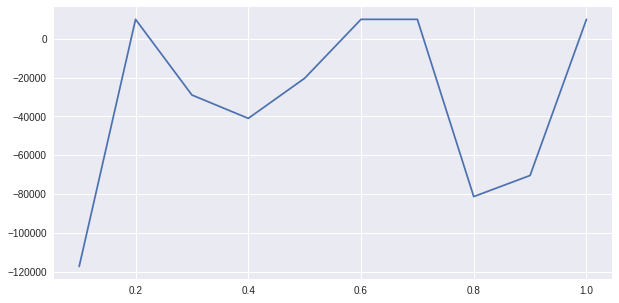

In [73]:
plt.figure(figsize=(10,5))

plt.plot([0.1 * i for i in range(1, 11)] ,policy_data)

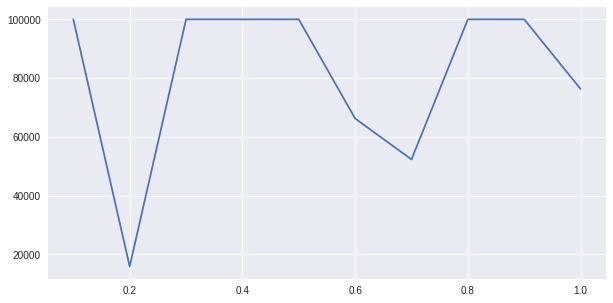

In [74]:
plt.figure(figsize=(10,5))

plt.plot([0.1 * i for i in range(1, 11)] ,policy_data_time)

In [86]:
T = 1000

cpu = mp.cpu_count()

value_policy_data = []
value_policy_data_time = []
value_history = []
for epsilon in tqdm(range(1, 11)):
    
    base_model = MDPModel()
    policy_agent = ValueIterationAgent(base_model, epsilon * 0.1)

    cur_reward = 0
    
    time = 0
    while cur_reward < 10 ** 4:
        reward = policy_agent.step(time)
        cur_reward += reward
        time += 1
        if time > 10 ** 5:
            break
    
        
    value_policy_data.append(cur_reward)
    value_policy_data_time.append(time)
    value_history.append(policy_agent.history)

100%|██████████| 10/10 [01:05<00:00,  6.96s/it]


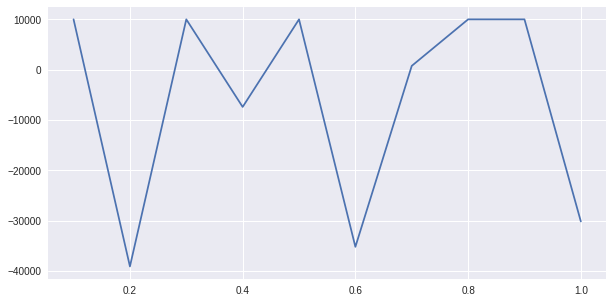

In [87]:
plt.figure(figsize=(10,5))

plt.plot([0.1 * i for i in range(1, 11)] , value_policy_data)

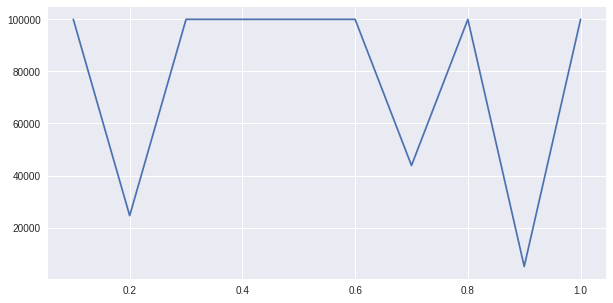

In [77]:
plt.figure(figsize=(10,5))

plt.plot([0.1 * i for i in range(1, 11)] ,value_policy_data_time)

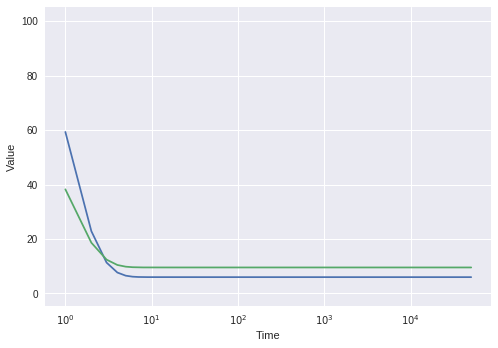

In [114]:
plt.semilogx(value_history[-1][(2,6)])
plt.semilogx(value_history[-1][(2,7)])
plt.xlabel('Time')
plt.ylabel('Value')

## 3. Модельная задача
В качестве модельной задачи выберем простые крестики-нолики. Существует два агента, один играет за $X$s, другой за $O$s. Один агент играет против другого и по сути являетя средой для другого игрока. Множество $\mathcal{S}_{X}$ - всевозможные допустимые расстановки крестиков после хода нолика и $\mathcal{S}_{O}$ - позиции после хода крестиков. Необходимо обучить обоих агентов в ходе серии игр друг с другом. Критерий достижения успеха - оба агента вам не проигрывают.

## 4. Метод временных разностей (Temporal difference)
Речь ниже пойдет уже о более современных методах, которые можно применять на практике. Представим, что мы вычисляем функцию $V^{\pi}(s)$ для нашей стратегии $\pi$. Пусть мы очередной раз посетили состояние $s_t$, а потом каким-то образом узнали итоговую наград $G_t$. Тогда постепенно посещая состояние $s_t$ раз за разом, используя экспоненциальное сглаживание, мы можем улучшать оценку $V^{\pi}$ для какой-то нашей стратегии $\pi$.

$$V^{\pi}(s_t) = V^{\pi}(s_t) + \alpha \big(G_t - V^{\pi}(s)\big)$$

Однако можно сделать небольшой трюк и расписать оценку $G_t$
$$V^{\pi}(s_t) = V^{\pi}(s_t) + \alpha \big(R_t + \gamma V^{\pi}(S_t) - V^{\pi}(s)\big),$$
тем самым мы получим формулы для итеративного вычисления функции $V^{\pi}(s)$ после каждого посещения состояния $s$. Аналогичным образомы мы можем вычислять и 
$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha \big(R_{t+1} + \gamma Q^{\pi}(S_{t+1}, A_{t+1}) - Q^{\pi}(s_t, a_t)\big).$$

#### SARSA (State-Action-Reward-State-Action)
Итак, мы хотим найти оптимальную стратегию $\pi^{*}$. Пусть у нас есть некоторая стартовая апроксимация $Q(s, a)$. На основе нее мы создаем $\varepsilon$ жадную стратегию $\mathcal{A}_s = \arg\max_{a \in \mathcal{A}} Q(s, a)$, тогда

$$\pi(a|s)=\frac{1-\varepsilon}{|\mathcal{A}_s|}[a \in \mathcal{A}_s] + \frac{\varepsilon}{|\mathcal{A}|},\ \varepsilon \in [0, 1].$$

После этого в соответствии со стратегией $\pi$ делаем шаг $a_t$ получаем награду $R_{t+1}$ и переходим в состояние $S_{t+1}$. Еще раз делаем выбор действия $A_{t+1} \sim \pi(a|S_{t+1})$, но не говорим его среде, а лишь используем для обновления $Q$
$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha \big(R_{t+1} + \gamma Q^{\pi}(S_{t+1}, A_{t+1}) - Q^{\pi}(s_t, a_t)\big).$$

При обновлении $Q$ так же есть средняя вариация, вы можете использовать среднее значение для оценки дальнейшего выигрыша

$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha \big(R_{t+1} + \gamma \sum_b \pi(b|S_{t+1}) Q^{\pi}(S_{t+1}, b) - Q^{\pi}(s_t, a_t)\big).$$

####  Q-обучение (Q-learning)
Идея этого подхода очень похожа, только жадность также применяется в момент обновления  функции $Q$ 
$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha \big(R_{t+1} + \gamma \max_{b} Q(S_{t+1}, b) - Q(s_t, a_t)\big).$$

**Задание**
1. Реализуйте оба алгоритма в рамках модельной задачи.
2. Оцените, какой из них быстрее сходится, как бы вы это стали делать?
3. Сравните на сколько сильно отличаются оценки $Q(s_t, a_t)$. Предложите свой способ.
4. Попробуйте сыграть со своим алгоритма. Используйте намеренно проигрышную стратегию за ноликов. Что произошло? Попробуйте обыграть агента за крестиков.

In [115]:
class TicTacToeModel(Model):
    def __init__(self):
        self.zeros_place = 0
        self.x_place = 0
        self.winner_positions = [14, 112, 896, 146, 292, 584, 546, 168]
        self.times = 0
        self.x_wins = 0
        self.zero_wins = 0
        
        
    def get_reward(self, mode):
        self.times += 1
        winner = 0
        for elem in self.winner_positions:
            if (self.x_place & elem) == elem:
                winner = 1
                self.x_wins += 1
                break
            if (self.zeros_place & elem) == elem:
                winner = -1
                self.zero_wins += 1
                break
        reward = 0
        if mode == 1:
            if winner == 1:
                reward = 1
            if winner == 0:
                reward = 0
            if winner == -1:
                reward = -1
        if mode == -1:
            if winner == 1:
                reward = -1
            if winner == 0:
                reward = 0
            if winner == -1:
                reward = 1
                
        if self.times == 2:
            self.times = 0
            if reward != 0:
                self.reset_game()
                return reward
        if (self.x_place | self.zeros_place) == 1022:
            self.reset_game()
        return reward
    
    def print_game(self):
        space = ['_' for i in range(9)]
        i = 1
        for degree in range(1, 10):
            temp_num = i << degree 
            if self.zeros_place & temp_num:
                space[degree - 1] = 'O'
            if self.x_place & temp_num:
                space[degree - 1] = 'X'
        space = np.array(space)
        space = space.reshape((3,3))
        print(space)

    def reset_game(self):
        self.zeros_place = 0
        self.x_place = 0

In [120]:
class TicTacToeSARSAPlayer(Agent):
    def __init__(self, game, mode, epsilon, alpha, gamma):
        self.model = game
        self.q_function = np.zeros((1023))
        self.mode = mode
        self.policy = np.zeros((9))
        self.epsilon = epsilon
        self.gamma = gamma
        self.alpha = alpha
        self.pool_activity = []
        
    def update_Q(self, time, cur_reward, action):
        current_state = 1022 ^ (game.zeros_place | game.x_place)
        action = self.choose_action(time)
        next_state = self.pool_activity[action]
        self.q_function[current_state] += self.alpha * (game.get_reward(self.mode) + self.gamma * self.q_function[next_state]  - self.q_function[current_state] )
    
    def get_policy(self):
        available_positions = 1022 ^ (game.zeros_place | game.x_place)
        
        pool_activity = []
        i = 1
        for degree in range(1, 10):
            temp_num = i << degree 
            if available_positions & temp_num:
                pool_activity.append(available_positions & (~temp_num))
                
        available_q = []
        for elem in pool_activity:
            available_q.append(self.q_function[elem])
        argmax_states = self.argmax(available_q)
        
        policy = np.full((len(pool_activity)), self.epsilon / len(pool_activity))
        np.put(policy, argmax_states, (1 - self.epsilon) / len(argmax_states))
        self.pool_activity = pool_activity
        return policy
        
    def do_action(self, action):
        cur_state = self.pool_activity[action]
        available_positions = 1022 ^ (game.zeros_place | game.x_place)
        diff = cur_state ^ available_positions
        if self.mode == 1:
            game.x_place |= diff
        if self.mode == -1:
            game.zeros_place |= diff
            
    def choose_action(self, time):
        policy_argmax = self.argmax(self.get_policy())        
        return policy_argmax[np.random.randint(0, policy_argmax.size)]
            

    def step(self, time):
        action = self.choose_action(time)
        self.do_action(action)
        cur_reward = game.get_reward(self.mode)
        self.update_Q(time, cur_reward, action)
        self.correct_strategy(cur_reward, action)
        return cur_reward

In [127]:
class TicTacToeQPlayer(Agent):
    def __init__(self, game, mode, epsilon, alpha, gamma):
        self.model = game
        self.q_function = np.zeros((1023))
        self.mode = mode
        self.policy = np.zeros((9))
        self.epsilon = epsilon
        self.gamma = gamma
        self.alpha = alpha
        self.pool_activity = []
        
    def update_Q(self, time, cur_reward, action):
        current_state = 1022 ^ (game.zeros_place | game.x_place)
        action = self.choose_action(time)
        q_next_state = 0
        for elem in self.pool_activity:
            q_next_state = max(q_next_state, self.q_function[elem])
        self.q_function[current_state] += self.alpha * (game.get_reward(self.mode) + self.gamma * q_next_state  - self.q_function[current_state] )
    
    def get_policy(self):
        available_positions = 1022 ^ (game.zeros_place | game.x_place)
        
        pool_activity = []
        i = 1
        for degree in range(1, 10):
            temp_num = i << degree 
            if available_positions & temp_num:
                pool_activity.append(available_positions & (~temp_num))
                
        available_q = []
        for elem in pool_activity:
            available_q.append(self.q_function[elem])
        argmax_states = self.argmax(available_q)
        
        policy = np.full((len(pool_activity)), self.epsilon / len(pool_activity))
        np.put(policy, argmax_states, (1 - self.epsilon) / len(argmax_states))
        self.pool_activity = pool_activity
        return policy
    
    def choose_action(self, time):
        policy_argmax = self.argmax(self.get_policy())        
        return policy_argmax[np.random.randint(0, policy_argmax.size)]
        
    def do_action(self, action):
        cur_state = self.pool_activity[action]
        available_positions = 1022 ^ (game.zeros_place | game.x_place)
        diff = cur_state ^ available_positions
        if self.mode == 1:
            game.x_place |= diff
        if self.mode == -1:
            game.zeros_place |= diff
        return diff
            

    def step(self, time):
        action = self.choose_action(time)
        diff = self.do_action(action)
        cur_reward = game.get_reward(self.mode)
        self.update_Q(time, cur_reward, action)
        self.correct_strategy(cur_reward, action)
        return cur_reward

In [122]:
game = TicTacToeModel()
ex = TicTacToeSARSAPlayer(game, 1, 0.4, 0.02, 0.99)
zero = TicTacToeSARSAPlayer(game, -1, 0.4, 0.02, 0.99)

In [123]:
for iteration in tqdm(range(200000)):
    ex.step(1)
    zero.step(1)
print('X win = ', game.x_wins, ' Zero win = ', game.zero_wins)

100%|██████████| 200000/200000 [01:02<00:00, 3203.95it/s]

X win =  99905  Zero win =  75


In [128]:
game = TicTacToeModel()
ex = TicTacToeQPlayer(game, 1, 0.2, 0.01, 0.99)
zero = TicTacToeQPlayer(game, -1, 0.2, 0.01, 0.99)

In [129]:
for iteration in tqdm(range(200000)):
    ex.step(1)
    zero.step(1)
print('X win = ', game.x_wins, ' Zero win = ', game.zero_wins)

100%|██████████| 200000/200000 [01:03<00:00, 3137.46it/s]

X win =  133210  Zero win =  49
